In [1]:
import tensorflow
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

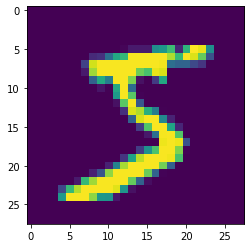

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [4]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [5]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [9]:
train_generator = train_gen.flow(x_train, y_train)
test_generator = test_gen.flow(x_test, y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5412 - accuracy: 0.8277 - val_loss: 0.1367 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2465 - accuracy: 0.9234 - val_loss: 0.0908 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1971 - accuracy: 0.9408 - val_loss: 0.0699 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1711 - accuracy: 0.9477 - val_loss: 0.0657 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1534 - accuracy: 0.9534 - val_loss: 0.0597 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1370 - accuracy: 0.

In [14]:
model.save('mnist_cnn.h5')